# Qiskit VQE Tutorial
Full tutorial using Qiskit VQE class following
https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/algorithms/02_vqe_advanced_options.ipynb

In [225]:
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import NELDER_MEAD
from qiskit_nature.circuit.library.ansatzes import UCC
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.utils import algorithm_globals
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

from qiskit import QuantumCircuit


In [226]:
# Hamiltonian operator creation
H2_op = SparsePauliOp.from_list(
    [
        ("IIII", -1.43345753),
        ("IZII", 0.9435743),
        ("ZIZI", -0.39793742484318045),
        ("ZZIZ", -0.2428010425623538),
        ("XXXX", 0.18093119978423156),
    ]
)

In [227]:
H2_op.num_qubits

4

In [228]:
# create estimator, optimizer, converter, ansatz
estimator = Estimator()
# optimizer definition
optimizer = NELDER_MEAD(maxiter=100)
# use UCC Ansatz
converter = QubitConverter(mapper=JordanWignerMapper(), two_qubit_reduction=True)
#ansatz = UCC(excitations='st')

qc = QuantumCircuit(4)
qc.x(0)
qc.x(1)

In [229]:
qc.num_qubits

4

In [230]:
ucc_ansatz = UCC(qubit_converter=converter, num_spin_orbitals=4, num_particles=(0,2), excitations='sd', alpha_spin=True, beta_spin=True, max_spin_excitation=1, generalized=True, preserve_spin=True, reps=5)

In [231]:
ucc_ansatz.num_qubits
# has to be equal to the ones of the hamiltonian

4

In [232]:
print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
algorithm_globals.random_seed = 50

# use ansatz TwoLocal
#ansatz2 = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
counts = []
values = []

Optimizer: NELDER_MEAD        

In [233]:
def store_intermediate_result(eval_count, parameters, mean, std):
    # print("Iteration done")
    counts.append(eval_count)
    values.append(mean)

In [234]:
# Use VQE with estimator, ansatz, optimizer
vqe = VQE(estimator, ucc_ansatz, optimizer, callback=store_intermediate_result)
# invoke computation on the operator
result = vqe.compute_minimum_eigenvalue(operator=H2_op)

converge_counts = np.asarray(counts)
converge_vals = np.asarray(values)

print("\rOptimization complete");

Optimization complete


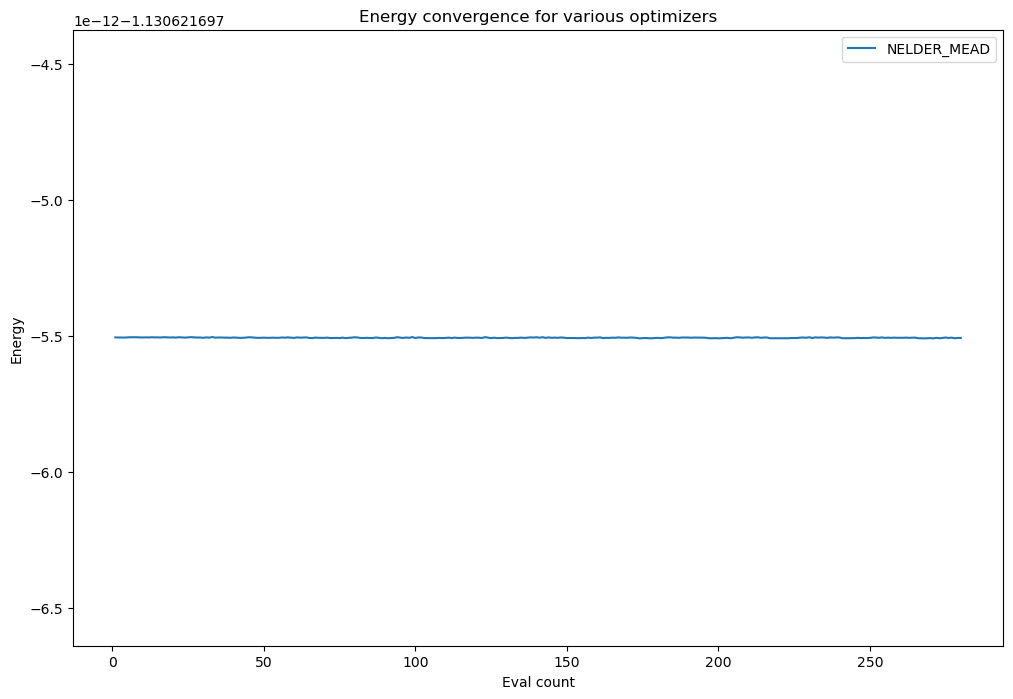

In [235]:
# Outputting the optimization process
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
pylab.plot(converge_counts, converge_vals, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [236]:
# Analytic solution
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.opflow import PauliSumOp

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=PauliSumOp(H2_op))
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -3.03149
